# Hand signs dataset


The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabet letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. 

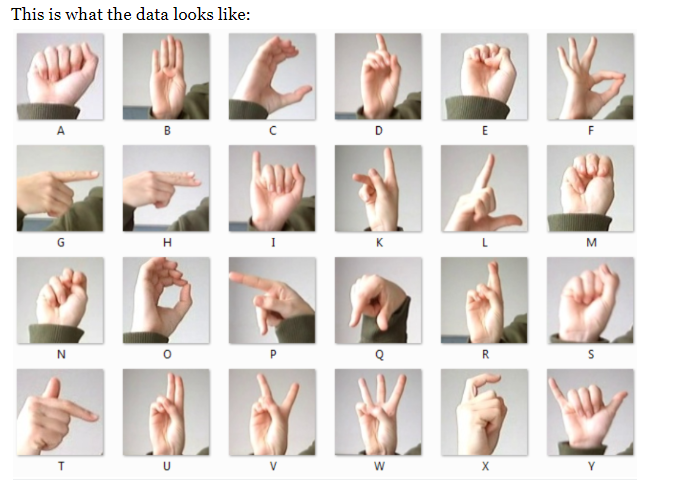

### Prerequisites
We would highly recommend that before the hack night you have some kind of toolchain and development environment already installed and ready. If you have no idea where to start with this, try a combination like:
* **Python**
* **scikit-learn / sklearn**
* **Pandas**
* **NumPy**
* **matplotlib**
<br>
An environment to work in - something like Jupyter or Spyder
For Linux people, your package manager should be able to handle all of this. If it somehow can't, see if you can at least install Python and pip and then use pip to install the above packages.

### Objectives in this project:
* **View the data as an image**
* **Train different classifiers**
* **Compare performance for different classifiers using various metrics**

<br>

### Content and Dataset description:
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.
* To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
* For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.
#### Workflow:
* Form a matrix of the pixel values of shape 28x28 using row major format as described above.
* Use matplotlib library to view the image through imshow().
* Use various standard classifiers using the sklearn library to predict the class of the data.
* Compare the performance of the classifiers using various classification metrics like AUC,f1-score ,accuracy_score etc.


## Importing the necessary Libraries
**numpy**
    NumPy is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object; sophisticated (broadcasting) functions

**pandas**
    In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

**datetime**
    In Python, date, time and datetime classes provides a number of function to deal with dates, times and time intervals. Date and datetime are an object in Python, so when you manipulate them, you are actually manipulating objects and not string or timestamps.

**matplotlib**
    Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import datetime
from sklearn.metrics import confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

#### Loading the Dataset

In [3]:
df = pd.read_csv('sign_mnist_train.csv')

In [4]:
df.shape

(27455, 785)

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
x=df.loc[:,df.columns!='label']
y=df['label']

In [8]:
print(x.shape)
print(y.shape)
print(type(x))

(27455, 784)
(27455,)
<class 'pandas.core.frame.DataFrame'>


In [9]:
x2=x.values
print(type(x2))

<class 'numpy.ndarray'>


In [10]:
y2=y.values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [12]:
from sklearn.model_selection import train_test_split as tts
train_x , test_x , train_y , test_y = tts(x , y , test_size = 0 , random_state = 0)

In [13]:
train_y.shape

(27455,)

In [14]:
df.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

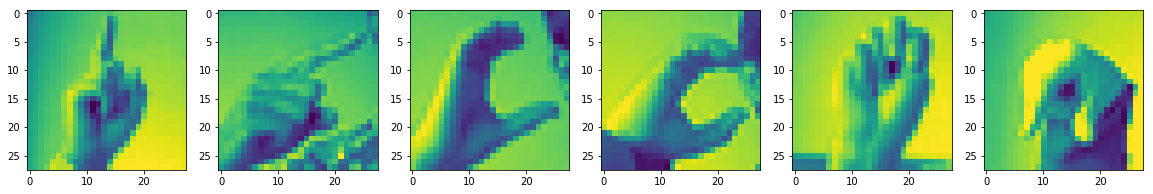

In [15]:
plt.figure(figsize = (20,4))
for index , (image,label) in enumerate(zip(x2[0:6] , y2[0:6])):
  plt.subplot(1,6,index+1)
  plt.imshow(np.reshape(image , (28,28)) )

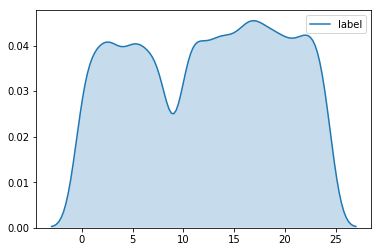

In [16]:
sns.kdeplot(y,shade=True)

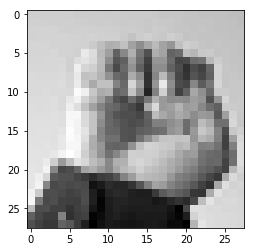

In [17]:
imag=x2[27427]
imag.shape=(28,28)
plt.subplot(1,1,1)
plt.imshow(imag,cmap=plt.cm.gray)

# Train-Test Split
## x_train :
The dataset over which the model will be trained upon. Our classifier models will be trained on this data.

## y_train :
This is the labelled dataset corresponding to the x_train, this contains the target labels corresponding to the Images of the dataset.

## x_test :
This is the dataset kept aside to test the Machine Learning model trained upon the Dataset x_train, so that out model will have unseen data to predict and test upon.

## y_test :
This is the labelled dataset corresponding to the x_train, this contains the target labels corresponding to the Images of the dataset.

In [18]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x2 , y2 , test_size = 0.3 , random_state =0)

# Dimensionality Reduction
Dimensionality Reduction is the technique of representing multi-dimensional(data with multiple features having a correlation with each other) data in 2 or 3 dimensions. Having too many features in the training set can make the process extremely slow and is not able to give a good solution.

# PCA (Principal Component Analysis)
PCA is a dimensionality reduction technique that can be used for data compression to speed up learning algorithms as well as for visualizations of complex datasets.

In [18]:
from sklearn import decomposition
pca = decomposition.PCA()

In [19]:
pca.n_components = 2
pca_data = pca.fit_transform(x)

print("Reduced PCA shape = ", pca_data.shape)

Reduced PCA shape =  (27455, 2)


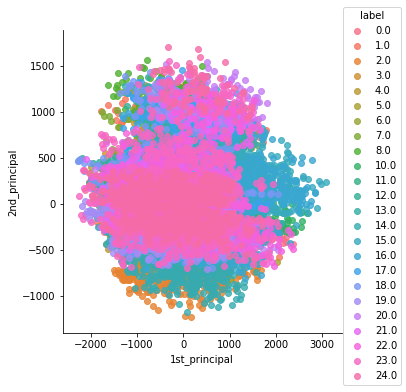

In [20]:
# attaching the label for each 2-d data point 
pca_dat = np.vstack((pca_data.T, y)).T


pca_df = pd.DataFrame(data=pca_dat, columns=("1st_principal", "2nd_principal", "label"))
sns.lmplot('1st_principal', '2nd_principal', data=pca_df, hue='label', fit_reg=False)
plt.show()

# Observation:
PCA is a good choice for dimensionality reduction and visualisation for datasets when we have large number of features but it will not be able to interpret complex polynomial relationship bewteen features.

### Comparing the images before and after applying the PCA

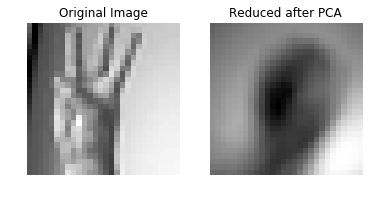

In [21]:
import matplotlib
imag = x2[7]
imag.shape = (28,28)


a = plt.subplot(1,2,1)
a.set_title('Original Image')
plt.imshow(imag,cmap=plt.cm.gray)
plt.axis("off")

imag = pca.inverse_transform(pca_data[7])
imag.shape = (28,28)

b = plt.subplot(1,2,2)
b.set_title("Reduced after PCA")
plt.imshow(imag,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

# t-SNE (T-Distributed Stochastic Neighbouring Entities)
t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. Contrary to PCA it is not a mathematical technique but a probablistic one.

In [39]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2).fit_transform(x)
#TSNE=tsne.fit_transform(x)
print(tsne.shape)

(27455, 2)


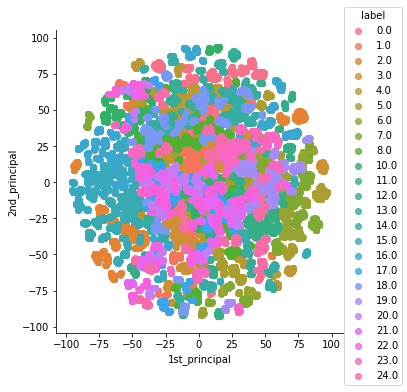

In [40]:
tsne_data = np.vstack((tsne.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st_principal", "2nd_principal", "label"))
sns.lmplot('1st_principal', '2nd_principal', data=tsne_df, hue='label', fit_reg=False)
plt.show()

##### This is a significant improved visualization over the PCA visualization.

**t-SNE** scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical and the memory requirements become too large.

# Data Modelling
### Logistic Regression
Logistic Regression is a method for classifying data into discrete outcomes

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

ini = datetime.datetime.now()
model.fit(train_x , train_y)
fin = datetime.datetime.now()
log_train_time = fin - ini
print('Training Time=',log_train_time)

Training Time= 0:04:33.577069


In [20]:
start=datetime.datetime.now()
pred_y = model.predict(test_x)
end = datetime.datetime.now()
log_pred_test_time = end - start
print('Pred. Test Time=',log_pred_test_time)

Pred. Test Time= 0:00:00.359411


In [21]:
d = {'Actual' : test_y , 'Predicted' : pred_y}
out = pd.DataFrame(data = d)
print(out)

      Actual  Predicted
0         15         15
1          0          0
2         15         15
3          6          6
4          0          0
5         15         15
6          8          8
7         17         17
8         23         23
9          4          4
10        19         19
11         6          6
12         2          2
13         1          1
14        22         22
15        10         10
16        19         19
17        15         15
18        21         21
19         6          6
20        15         15
21        12         12
22        16         16
23         6          6
24        14         14
25        16         16
26        14         14
27        10         10
28        11         11
29        17         17
...      ...        ...
8207      19         19
8208      15         15
8209      19         19
8210      18         18
8211       6          6
8212      17         17
8213      13         13
8214      23         23
8215       2          2
8216      19    

In [22]:
print(accuracy_score(test_y ,pred_y))

1.0


[[340   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 304   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 337   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 385   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 295   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 357   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 331   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 304   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 327   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 306   0   0   0   0   0   0   0   0
    0   0   0   0

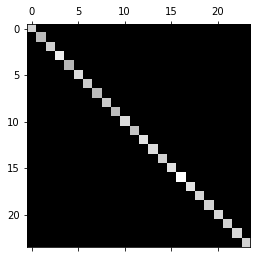

In [23]:
print(confusion_matrix(test_y ,pred_y))
plt.matshow(confusion_matrix(test_y ,pred_y) , cmap = plt.cm.gray, )
plt.show()

# Naive Baye's
## Gaussian Naive Baye's

In [24]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()

ini=datetime.datetime.now()
model1.fit(train_x , train_y)
fin = datetime.datetime.now()
nbg_train_time = fin - ini
print('Training Time=',nbg_train_time)

Training Time= 0:00:01.152667


In [25]:
start=datetime.datetime.now()
pred_y = model1.predict(test_x)
end = datetime.datetime.now()
nbg_pred_test_time = end - start
print('Pred. Test Time=',nbg_pred_test_time)

Pred. Test Time= 0:00:02.568134


In [26]:
d = {'Actual' : test_y , 'Predicted' : pred_y}
out = pd.DataFrame(data = d)
print(out)

      Actual  Predicted
0         15         15
1          0          4
2         15         22
3          6          6
4          0          0
5         15         15
6          8          8
7         17         17
8         23         23
9          4          4
10        19         19
11         6         19
12         2         14
13         1          5
14        22         21
15        10         10
16        19         19
17        15         15
18        21         17
19         6         19
20        15         15
21        12         12
22        16         16
23         6          5
24        14         14
25        16          7
26        14         14
27        10         17
28        11         11
29        17         17
...      ...        ...
8207      19         19
8208      15         15
8209      19         19
8210      18         15
8211       6         15
8212      17         17
8213      13         13
8214      23         23
8215       2         14
8216      19    

In [27]:
print("Confusion Matrix")
print(confusion_matrix(test_y , pred_y))

Confusion Matrix
[[154   0   0   0  36   0   0   0  20  17   0  15   5  16  29  12   0  34
    0   0   0   0   2   0]
 [  0 141   0   0  18  12   0   0  32  34   0   0   1   0  32   2  15   8
    0   4   0   5   0   0]
 [  0   0 264   0   1   3   8   0   0   3   2   0   0  25   7   9   0   0
   15   0   0   0   0   0]
 [  0   6   0 162  16  10   0   0  42  41   0   0   1   0  20  11  27  14
    9   5  10   1   6   4]
 [ 15   0   0   0 186   0   0   0   3   1   0  22   4   8   7  17   0  19
    3   4   0   1   5   0]
 [  1   2   3   2   5 128  16   0  10  18  10   0   0  23  26  15  19   1
   56   0  11   3   8   0]
 [  0   0   3   2   0  18 168  20   6   3  17   0   0   2   8  12   6   0
   63   1   0   0   2   0]
 [  0   0   0  10   0   4  52 115   1  22   1   0   0   2  11  11   0   0
   58   2   8   1   0   6]
 [ 10   0   0   4   0  11   4   0 206  14   0   4   1   4  11   3  12   8
    7   1   9  10   5   3]
 [  0   3   0   0   0   0   0   0   8 156   2   0   0   0  26   1  60   0


In [28]:
print(accuracy_score(test_y ,pred_y))

0.4490712638096394


## Multinomial Naive Baye's

In [29]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model1.fit(train_x , train_y)
pred_y = model1.predict(test_x)

In [30]:
d = {'Actual' : test_y , 'Predicted' : pred_y}
out = pd.DataFrame(data = d)
print(out)

      Actual  Predicted
0         15         15
1          0          4
2         15         22
3          6          6
4          0          0
5         15         15
6          8          8
7         17         17
8         23         23
9          4          4
10        19         19
11         6         19
12         2         14
13         1          5
14        22         21
15        10         10
16        19         19
17        15         15
18        21         17
19         6         19
20        15         15
21        12         12
22        16         16
23         6          5
24        14         14
25        16          7
26        14         14
27        10         17
28        11         11
29        17         17
...      ...        ...
8207      19         19
8208      15         15
8209      19         19
8210      18         15
8211       6         15
8212      17         17
8213      13         13
8214      23         23
8215       2         14
8216      19    

In [31]:
print("Confusion Matrix")
print(confusion_matrix(test_y , pred_y))

Confusion Matrix
[[154   0   0   0  36   0   0   0  20  17   0  15   5  16  29  12   0  34
    0   0   0   0   2   0]
 [  0 141   0   0  18  12   0   0  32  34   0   0   1   0  32   2  15   8
    0   4   0   5   0   0]
 [  0   0 264   0   1   3   8   0   0   3   2   0   0  25   7   9   0   0
   15   0   0   0   0   0]
 [  0   6   0 162  16  10   0   0  42  41   0   0   1   0  20  11  27  14
    9   5  10   1   6   4]
 [ 15   0   0   0 186   0   0   0   3   1   0  22   4   8   7  17   0  19
    3   4   0   1   5   0]
 [  1   2   3   2   5 128  16   0  10  18  10   0   0  23  26  15  19   1
   56   0  11   3   8   0]
 [  0   0   3   2   0  18 168  20   6   3  17   0   0   2   8  12   6   0
   63   1   0   0   2   0]
 [  0   0   0  10   0   4  52 115   1  22   1   0   0   2  11  11   0   0
   58   2   8   1   0   6]
 [ 10   0   0   4   0  11   4   0 206  14   0   4   1   4  11   3  12   8
    7   1   9  10   5   3]
 [  0   3   0   0   0   0   0   0   8 156   2   0   0   0  26   1  60   0


In [32]:
print(accuracy_score(test_y ,pred_y))

0.4490712638096394


# SVM (Support Vector Machines)
#### Linear Kernel

In [33]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')

ini=datetime.datetime.now()
model.fit(train_x , train_y)
fin = datetime.datetime.now()
lsvm_train_time = fin - ini
print('Training Time=',lsvm_train_time)

Training Time= 0:01:14.802902


In [34]:
start=datetime.datetime.now()
y_pred = model.predict(test_x)
end = datetime.datetime.now()
lsvm_pred_test_time = end - start
print('Pred. Test Time=',lsvm_pred_test_time)

Pred. Test Time= 0:00:34.774419


In [35]:
d = {'Actual' : test_y , 'Predicted' : y_pred}
out = pd.DataFrame(data = d)
print(out)

      Actual  Predicted
0         15         15
1          0          0
2         15         15
3          6          6
4          0          0
5         15         15
6          8          8
7         17         17
8         23         23
9          4          4
10        19         19
11         6          6
12         2          2
13         1          1
14        22         22
15        10         10
16        19         19
17        15         15
18        21         21
19         6          6
20        15         15
21        12         12
22        16         16
23         6          6
24        14         14
25        16         16
26        14         14
27        10         10
28        11         11
29        17         17
...      ...        ...
8207      19         19
8208      15         15
8209      19         19
8210      18         18
8211       6          6
8212      17         17
8213      13         13
8214      23         23
8215       2          2
8216      19    

In [36]:
print('Accuracy Score=',accuracy_score(test_y , y_pred))

Accuracy Score= 1.0


In [37]:
print('Confusion Matrix')
print(confusion_matrix(test_y , y_pred))

Confusion Matrix
[[340   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 304   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 337   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 385   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 295   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 357   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 331   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 304   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 327   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 306   0   0   0   0   0   0   0   0


#### Polynomial Kernel

In [38]:
model = SVC(kernel = 'poly' , degree = 6)

ini=datetime.datetime.now()
model.fit(train_x , train_y)
fin = datetime.datetime.now()
psvm_train_time = fin - ini
print('Training Time=',psvm_train_time)

Training Time= 0:00:55.969170


In [39]:
start=datetime.datetime.now()
y_pred = model.predict(test_x)
end = datetime.datetime.now()
lsvm_pred_test_time = end - start
print('Pred. Test Time=',lsvm_pred_test_time)

Pred. Test Time= 0:00:23.369142


In [40]:
print('Accuracy Score=',accuracy_score(test_y , y_pred))
print('Confusion Matrix')
print(confusion_matrix(test_y , y_pred))

Accuracy Score= 0.9980575452227752
Confusion Matrix
[[336   0   0   0   0   0   0   0   1   0   0   1   1   0   0   0   0   1
    0   0   0   0   0   0]
 [  0 304   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 337   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 385   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 295   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 354   1   0   0   1   1   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 331   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 304   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 327   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 3

#### Gaussian/RBF Kernel

In [47]:
model = SVC(kernel = 'rbf')

ini=datetime.datetime.now()
model.fit(train_x , train_y)
fin=datetime.datetime.now()
rbf_train_time = fin - ini
print('Training Time=',rbf_train_time)

Training Time= 0:24:42.328538


In [48]:
start=datetime.datetime.now()
y_pred = model.predict(test_x)
end = datetime.datetime.now()
rbf_pred_test_time = end - start
print('Pred. Test Time=',rbf_pred_test_time)

Pred. Test Time= 0:05:12.269522


In [49]:
print('Accuracy Score=',accuracy_score(test_y , y_pred))
print('Confusion Matrix')
print(confusion_matrix(test_y , y_pred))

Accuracy Score= 0.21694791793128565
Confusion Matrix
[[ 58   0   0   0   0   0   0   0   0   0   0   0   0   0   0 282   0   0
    0   0   0   0   0   0]
 [  0  39   0   0   0   0   0   0   0   0   0   0   0   0   0 265   0   0
    0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0   0   0   0   0   0 262   0   0
    0   0   0   0   0   0]
 [  0   0   0  67   0   0   0   0   0   0   0   0   0   0   0 318   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  31   0   0   0   0   0   0   0   0   0   0 264   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0  58   0   0   0   0   0   0   0   0   0 299   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  60   0   0   0   0   0   0   0   0 271   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  53   0   0   0   0   0   0   0 251   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  74   0   0   0   0   0   0 253   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 

#### Sigmoid Kernel

In [50]:
from sklearn.svm import SVC
model = SVC(kernel = 'sigmoid')

ini=datetime.datetime.now()
model.fit(train_x , train_y)
fin=datetime.datetime.now()
sig_train_time = fin - ini
print('Training Time=',sig_train_time)

Training Time= 0:19:24.628333


In [51]:
start=datetime.datetime.now()
y_pred = model.predict(test_x)
end = datetime.datetime.now()
sig_pred_test_time = end - start
print('Pred. Test Time=',sig_pred_test_time)

Pred. Test Time= 0:04:27.761738


In [53]:
print('Accuracy Score=',accuracy_score(test_y , y_pred))
print('Confusion Matrix')
print(confusion_matrix(test_y , y_pred))

Accuracy Score= 0.04431224960543887
Confusion Matrix
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 340   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 304   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 337   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 385   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 295   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 357   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 331   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 304   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 327   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 

## KNN (K Nearest Neighbour)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24)

In [55]:
ini=datetime.datetime.now()
knn.fit(train_x , train_y)
fin=datetime.datetime.now()
knn_train_time = fin - ini
print('Training Time=',knn_train_time)

Training Time= 0:00:01.972813


In [56]:
start=datetime.datetime.now()
y_pred = knn.predict(test_x)
end = datetime.datetime.now()
knn_pred_test_time = end - start
print('Pred. Test Time=',knn_pred_test_time)

Pred. Test Time= 0:06:55.653287


In [57]:
print('Accuracy Score=',accuracy_score(test_y , y_pred))

Accuracy Score= 0.9442758285783659


In [58]:
print('Confusion Matrix')
print(confusion_matrix(test_y , y_pred))

Confusion Matrix
[[332   3   0   0   2   0   0   0   0   0   0   0   2   0   0   0   0   1
    0   0   0   0   0   0]
 [  0 286   0   4   0   0   0   0   0   3   0   0   0   0   0   0   1   0
    0   9   1   0   0   0]
 [  0   0 336   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 377   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   7   0]
 [  0   2   0   0 292   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   0   2   0 350   0   0   0   0   0   0   0   0   0   0   2   0
    2   0   0   0   0   0]
 [  0   0   0   0   0   0 323   4   0   0   0   0   0   0   0   0   0   0
    4   0   0   0   0   0]
 [  0   0   0   0   0   0  15 285   0   0   0   0   0   0   0   0   0   0
    4   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0 317   0   0   0   1   0   0   0   2   2
    1   0   0   0   0   3]
 [  0   0   0   0   0   0   0   0   0 282   0   0   0   0   0   0   3   0


## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini')

ini = datetime.datetime.now()
dtc.fit(train_x , train_y)
fin = datetime.datetime.now()
dtc_train_time = fin - ini
print('Training Time=',dtc_train_time)

Training Time= 0:00:21.382879


In [60]:
start = datetime.datetime.now() 
pred_y = dtc.predict(test_x)
end = datetime.datetime.now()
dtc_pred_test_time = end - start
print('Pred. Test Time=',dtc_pred_test_time)

Pred. Test Time= 0:00:00.027270


In [61]:
res = pd.DataFrame({'Actual':test_y , 'Predicted':pred_y})
print(res)
print("Accuracy score = " , accuracy_score(test_y , pred_y))

      Actual  Predicted
0         15         15
1          0          0
2         15         15
3          6          6
4          0          0
5         15         15
6          8          5
7         17         17
8         23         10
9          4          4
10        19         19
11         6          6
12         2         21
13         1          6
14        22         22
15        10         10
16        19         19
17        15         15
18        21         21
19         6          6
20        15         15
21        12         12
22        16         16
23         6          6
24        14         14
25        16         16
26        14         14
27        10         10
28        11         11
29        17         17
...      ...        ...
8207      19         19
8208      15         15
8209      19          8
8210      18         18
8211       6          6
8212      17         17
8213      13         10
8214      23         23
8215       2          2
8216      19    

In [62]:
print('Confusion Matrix')
print(confusion_matrix(test_y , y_pred))

Confusion Matrix
[[332   3   0   0   2   0   0   0   0   0   0   0   2   0   0   0   0   1
    0   0   0   0   0   0]
 [  0 286   0   4   0   0   0   0   0   3   0   0   0   0   0   0   1   0
    0   9   1   0   0   0]
 [  0   0 336   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 377   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   7   0]
 [  0   2   0   0 292   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   0   2   0 350   0   0   0   0   0   0   0   0   0   0   2   0
    2   0   0   0   0   0]
 [  0   0   0   0   0   0 323   4   0   0   0   0   0   0   0   0   0   0
    4   0   0   0   0   0]
 [  0   0   0   0   0   0  15 285   0   0   0   0   0   0   0   0   0   0
    4   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0 317   0   0   0   1   0   0   0   2   2
    1   0   0   0   0   3]
 [  0   0   0   0   0   0   0   0   0 282   0   0   0   0   0   0   3   0


## In this notebook total 8 algorithms have been analysed and implemented

### Evaluating Algorithms

In [41]:
Accuracy = [1.0, 1.0,0.04431224960543887, 0.9980575452227752, 0.21694791793128565,0.9442758285783659,0.4490712638096394
, 0.8617215005463154] 
train_time=[201.370,51.834,791.985,41.445,928.289,1.210,0.447,14.321]
pred_test_time=[0.323,23.611,178.797,14.551,187.051,295.141,2.352,0.174]

In [42]:
data = { 'Accuracy' : Accuracy,
        'Training_Time': train_time,
        'Predicted_Time': pred_test_time,
         'Algorithm': ['Logistic Regression','SVM Linear','SVM Sigmoid','SVM Polynomial','SVM RBF','KNN',"Naive Baye's",
                       'Decision Tree']}

In [43]:
df2 = pd.DataFrame( data)

## Comparing Accuracies Of Different Models

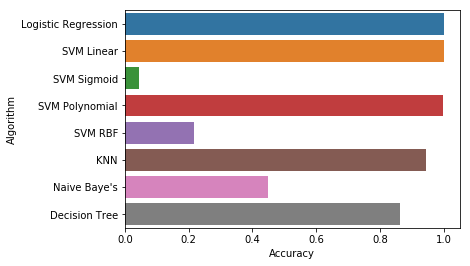

In [44]:
sns.barplot(x = df2.Accuracy, y = df2.Algorithm)

# Observation:

Logistic Regression, Linear SVM, Polynomial SVM gave the **highest accuracies** with respect to other machine learning classifier models.

## Comparison Based On Training Time

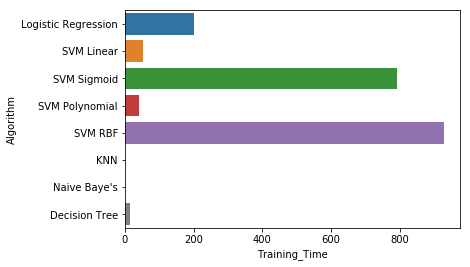

In [45]:
sns.barplot(x = df2.Training_Time, y = df2.Algorithm)

## Comparison Based On Prediction Time

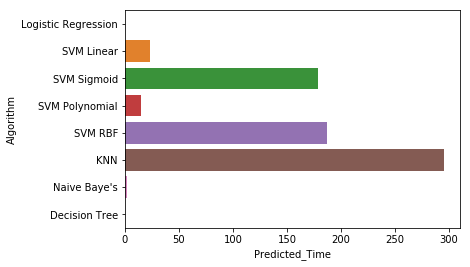

In [46]:
sns.barplot(x = df2.Predicted_Time, y = df2.Algorithm)